# <font color= #8A0829> Ciencia de datos e inteligencia de negocios.</font>
###  PROYECTO DE APLICACIÓN: MANEJO DE DATOS Y SIMILITUD.
> ESTE PROYECTO TIENE  COMO  FINALIDAD LA EVALUACIÓN DE LOS CONOCIMIENTOS ADQUIRIDOS DE MANEJO DE DATOS, INDICES DE SIMILITUD.

### Integrantes:

- Axel Munguia
- Pedro Aragón
- Juan Pablo Estavillo
- Abel García

___        

###  Objetivos.
El objetivo de este proyecto de aplicación se puede separar en tres fases: 
1. Limpieza de la base de datos
(eliminar datos nulos, normalizar textos, etc.).
2. Extracción de la información estadística básica que tienen los datos.
3. La obtención o formulación de conclusiones sobre el fenómeno del cual provienen los datos 
en base a los resultados de los análisis anteriores.

Referencia:
- http://cursos.iteso.mx/pluginfile.php/998521/mod_resource/content/8/PROYECTO%201c.pdf
- base de datos****


____

### 1. Obtención  de la  base  de  datos

In [2]:
from mylib import mylib 
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

data= pd.read_csv('../DATA/datos_matricula_carrera_2.1718_feb-jul_2018.csv', encoding='latin1')

data =data.iloc[:-1,:-1]
data=data.drop(['Entidad','Periodo'],axis=1)

____
### 2. Aplicar  el  estudio  de  calidad  de  los  datos  para  determinar  el  tipo  de  datos,  categorías  e información estadística básica
.

In [4]:
reporte_calidad = mylib.dqr(data)
reporte_calidad

,D_types,Missing_values,Present_values,Unique_values,Min,Max
Plantel,object,0,82,20,Academia Municipal de Enfermeria,Zapopan
Modelo educativo,object,0,82,13,2003,PROCEIES
Clave de la carrera,object,0,82,27,ALBE08,SOMA13B
Carrera Profesional Tecnico -Bachiller,object,0,82,38,Alimentos y Bebidas,en Enfermería General
Matricula,int64,0,82,64,0,875


### <font color= red> cosas dqr.</font>

### 3. Hacer uso de gráficos (plots, histogramas, boxplots) para mostrar la información estadística de la base de datos.

Text(0.5,0,'Modelo')

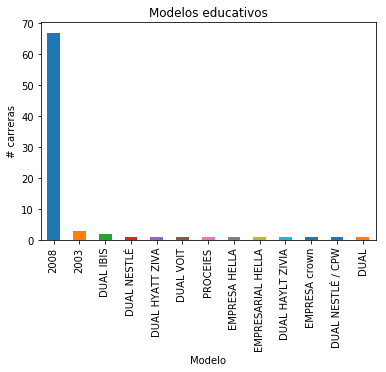

In [13]:
modelo = pd.value_counts(data['Modelo educativo'])
carreras=pd.value_counts(data['Carrera Profesional Tecnico -Bachiller'])
plantel=pd.value_counts(data['Plantel'])

indice = pd.DataFrame(plantel.index.values)
indice = pd.DataFrame(np.array(indice))


#%% modelos educativos
modelo.plot.bar(title = 'Modelos educativos')
plt.ylabel('# carreras')
plt.xlabel('Modelo')

### <font color= red> cosas graficas.</font>

Text(0.5,0,'Plantel')

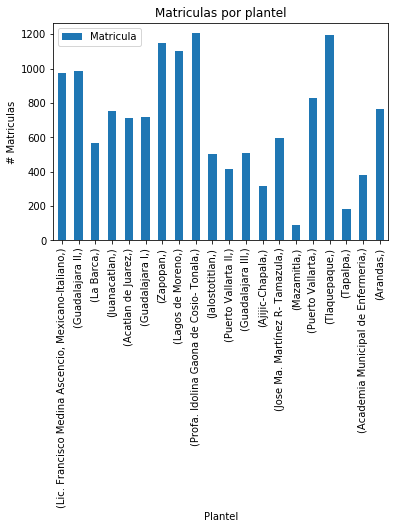

In [10]:
#%% Matriculas por plantel
indice = np.array(indice)
arr = []
data.index= data.Plantel
for k in indice:
    da= data.loc[k]
    arr.append(sum(da.Matricula))
arr = np.array(arr)
matriuclaxplantel = pd.DataFrame(indice)
matxpl= pd.DataFrame(columns= ['Matricula'], index = matriuclaxplantel)
matxpl['Matricula']= arr

matxpl.plot.bar(title = 'Matriculas por plantel')
plt.ylabel('# Matriculas')
plt.xlabel('Plantel')

### <font color= red> cosas graficas.</font>

Text(0.5,0,'Carrera')

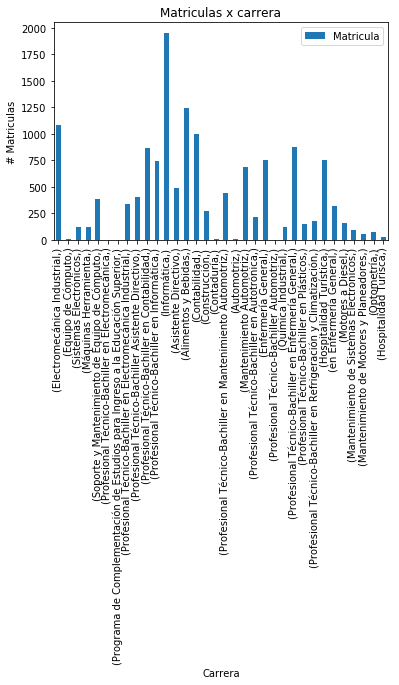

In [15]:
#%% matricula x carrera
carrera = pd.DataFrame(data['Carrera Profesional Tecnico -Bachiller'].index.values)

carrera = np.array(carrera)
arr = []
data.index= data['Carrera Profesional Tecnico -Bachiller']
for k in carrera:
    da= data.loc[k]
    arr.append(sum(da.Matricula))
arr = np.array(arr)
matriuclaxcarrera = pd.DataFrame(carrera)
matxca= pd.DataFrame(columns= ['Matricula'], index = matriuclaxcarrera)
matxca['Matricula']= arr
unique_values = pd.DataFrame(columns=['Unique_values'])
matxca.drop_duplicates().plot.bar(title = 'Matriculas x carrera')
plt.ylabel('# Matriculas')
plt.xlabel('Carrera')

### <font color= red> cosas graficas.</font>

Text(0.5,0,'Carrera')

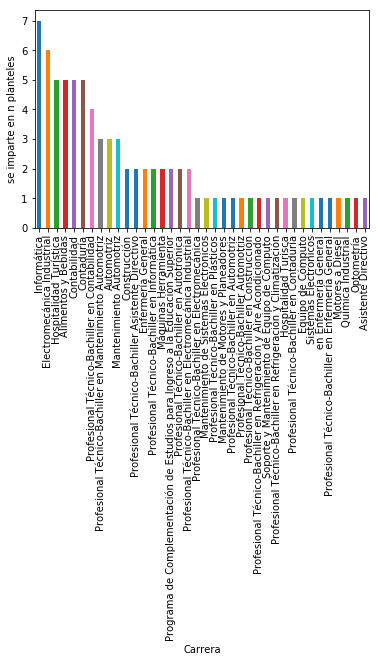

In [18]:
#%% carrera x plantel

carreras.plot.bar()
plt.ylabel('se imparte en n planteles')
plt.xlabel('Carrera')
